In [175]:
using Statistics, LinearAlgebra, CSV, Plots, DataFramesMeta
using RemoteREPL
@async serve_repl()

Task (runnable) @0x0000022f1352c5e0

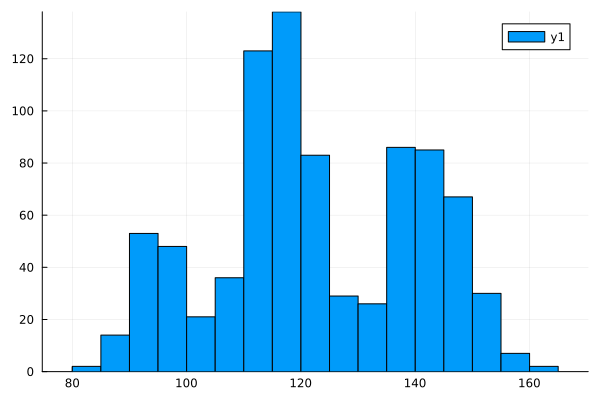

In [170]:
data = CSV.read("Results.csv", DataFrame)
data = data[data[!,2] .> 50, :]
histogram(data[:, 2])

In [171]:
data[:,2] |> median

119.0

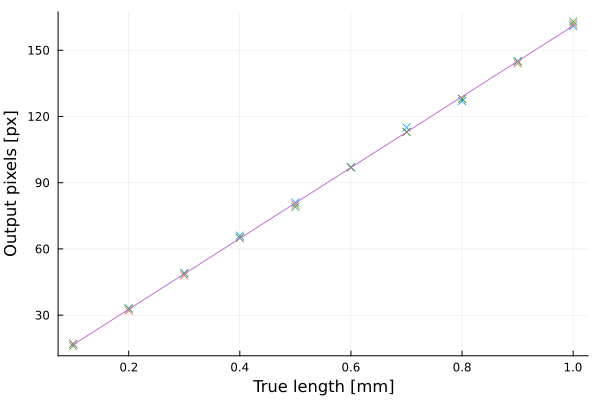

In [172]:
strs = [string("data\\",i,".",j,".csv") for i in 1:4 for j in 1:2]
data = CSV.read.(strs, DataFrame)
calibration = [
    161,
    159,
    161,
    160,
    162,
    161,
    159,
    159
] |> mean

xs = truelength = ((0.1:0.1:1) |> collect)
ys = calibration = [
    17  17  16;
    33  32  33;
    49  48  49;
    66  65  65;
    81  80  79;
    97  97  97;
    115 113 113;
    127 128 128;
    145 144 145;
    161 162 163
]

β_1 = cov(xs,ys) ./ var(xs) |> mean
β_0 = mean(ys) - β_1*mean(xs)

scatter(xs,ys, m=:xcross, legend=:none, 
    xlabel = "True length [mm]",
    ylabel = "Output pixels [px]"
)
plot!(xs, (xs*β_1 .+ β_0))

In [174]:

cehck = (data[1][:,2] .>= 0) .&& (data[1][:,2] .<5)
histogram(data[1][:,2])
quantile.([data[8][:,2]], 0.0:0.1:1)
data[1]
for i in 1:8
    sort!(data[i], "Area")
    data[i][:,2] .*= 1/β_1
end

plts = [histogram(data[i][
        1:findfirst(
            x -> x > quantile(data[i][:,2], .9), 
            data[i][:,2])
        ,2
    ]) for i in 1:8]
# plts = [histogram(data[i][:,2]) for i in 1:8]
plot(plts..., layout=(4,2))

InexactError: InexactError: Int64(0.00622876557191393)